In [191]:
import pandas as pd

dataset = pd.read_csv('../dataset/ks-projects-201612.csv',encoding='latin')
dataset.head()

/home/mohamedalgebali/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [192]:
dataset['main_category '].value_counts()

Film & Video    57679
Music           46744
Publishing      34233
Games           28008
Technology      26128
                ...  
People              1
Flight              1
Kids                1
Wearables           1
 soccer             1
Name: main_category , Length: 120, dtype: int64

In [193]:
dataset = dataset.drop(['country ','currency ','ID ','name ','category ','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','usd pledged '],axis=1)

In [194]:
dataset

,main_category,deadline,goal,launched,pledged,state,backers
0,Publishing,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0
1,Film & Video,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3
2,Music,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1
3,Film & Video,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14
4,Food,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224
...,...,...,...,...,...,...,...
323745,Film & Video,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1
323746,Film & Video,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5
323747,Film & Video,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1
323748,Technology,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6


In [195]:
dataset['goal '] = dataset['goal '].str.replace(r'[^0-9]','0') #must be '0' not 0
dataset['goal '] = dataset['goal '].astype(float)

In [196]:
dataset['pledged '] = dataset['pledged '].str.replace(r'[^0-9]','0')
dataset['pledged '] = dataset['pledged '].astype(float)

In [197]:
dataset

,main_category,deadline,goal,launched,pledged,state,backers
0,Publishing,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0
1,Film & Video,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3
2,Music,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1
3,Film & Video,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14
4,Food,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224
...,...,...,...,...,...,...,...
323745,Film & Video,2014-10-17 02:35:30,50000.0,2014-09-17 02:35:30,25.0,canceled,1
323746,Film & Video,2011-07-19 03:35:14,1500.0,2011-06-22 03:35:14,155.0,failed,5
323747,Film & Video,2010-08-16 05:59:00,15000.0,2010-07-01 19:40:30,20.0,failed,1
323748,Technology,2016-02-13 02:00:00,15000.0,2016-01-13 18:13:53,200.0,failed,6


In [198]:
index = dataset[dataset['deadline '].str.contains(r'[A-Z]')].index  #doesn't work in nan values

dataset.drop(index,inplace=True)

dataset['deadline ']=pd.to_datetime(dataset['deadline '],yearfirst=True)
dataset['launched ']=pd.to_datetime(dataset['launched '],yearfirst=True)

In [199]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323118 entries, 0 to 323749
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   main_category   323118 non-null  object        
 1   deadline        323118 non-null  datetime64[ns]
 2   goal            323118 non-null  float64       
 3   launched        323118 non-null  datetime64[ns]
 4   pledged         323118 non-null  float64       
 5   state           323118 non-null  object        
 6   backers         323118 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 19.7+ MB


In [200]:
dataset['duration']=dataset['deadline ']-dataset['launched ']

dataset['duration'] = dataset['duration'].apply(lambda x : x.days)

dataset

,main_category,deadline,goal,launched,pledged,state,backers,duration
0,Publishing,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,58
1,Film & Video,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,45
2,Music,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,30
3,Film & Video,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,55
4,Food,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224,35
...,...,...,...,...,...,...,...,...
323745,Film & Video,2014-10-17 02:35:30,50000.0,2014-09-17 02:35:30,25.0,canceled,1,30
323746,Film & Video,2011-07-19 03:35:14,1500.0,2011-06-22 03:35:14,155.0,failed,5,27
323747,Film & Video,2010-08-16 05:59:00,15000.0,2010-07-01 19:40:30,20.0,failed,1,45
323748,Technology,2016-02-13 02:00:00,15000.0,2016-01-13 18:13:53,200.0,failed,6,30


In [201]:
dataset['Y']=0
dataset.loc[(dataset['pledged ']>=dataset['goal ']),'Y']=1

In [202]:
#dataset.drop(['pledged ','state ','backers '],axis=1,inplace=True)

In [203]:
dataset.corr()

,goal,pledged,duration,Y
goal,1.000000,-0.000074,0.002519,-0.003360
pledged,-0.000074,1.000000,0.000342,0.055144
duration,0.002519,0.000342,1.000000,-0.023802
Y,-0.003360,0.055144,-0.023802,1.000000


In [204]:
X = dataset[['main_category ', 'duration', 'backers ', 'goal ']]
Y = dataset['Y']
X


,main_category,duration,backers,goal
0,Publishing,58,0,1000.0
1,Film & Video,45,3,45000.0
2,Music,30,1,5000.0
3,Film & Video,55,14,19500.0
4,Food,35,224,50000.0
...,...,...,...,...
323745,Film & Video,30,1,50000.0
323746,Film & Video,27,5,1500.0
323747,Film & Video,45,1,15000.0
323748,Technology,30,6,15000.0


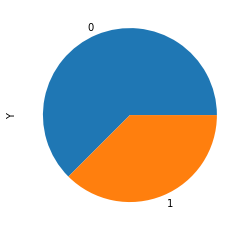

In [205]:
Y.value_counts().plot(kind='pie')

In [208]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
le = LabelEncoder()
X['main_category '] = le.fit_transform(X['main_category '])


/home/mohamedalgebali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [209]:
X

,main_category,duration,backers,goal
0,12,58,0,1000.0
1,6,45,3,45000.0
2,10,30,1,5000.0
3,6,55,14,19500.0
4,7,35,224,50000.0
...,...,...,...,...
323745,6,30,1,50000.0
323746,6,27,5,1500.0
323747,6,45,1,15000.0
323748,13,30,6,15000.0


In [211]:
le.transform(['Film & Video'])

array([6])

In [168]:
X['backers '] = X['backers '].astype(float)

/home/mohamedalgebali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323118 entries, 0 to 323749
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   main_category   323118 non-null  int64  
 1   duration        323118 non-null  int64  
 2   backers         323118 non-null  float64
 3   goal            323118 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 12.3 MB


In [114]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323118 entries, 0 to 323749
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   main_category   323118 non-null  int64  
 1   duration        323118 non-null  int64  
 2   backers         323118 non-null  float64
 3   goal            323118 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 12.3 MB


In [115]:
Y

0         0
1         0
2         0
3         0
4         1
         ..
323745    0
323746    0
323747    0
323748    0
323749    0
Name: Y, Length: 323118, dtype: int64

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [118]:
from sklearn.model_selection import cross_val_score
clf = SGDClassifier(penalty='l1')
accur = cross_val_score(clf,X=x_train,y=y_train,cv=3)
accur.mean()

0.633670099573637

In [120]:
clf.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77     20133
           1       1.00      0.00      0.00     12179

    accuracy                           0.62     32312
   macro avg       0.81      0.50      0.38     32312
weighted avg       0.77      0.62      0.48     32312



In [122]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8557192374350087

In [123]:
y_pred = lr.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     20133
           1       0.84      0.76      0.80     12179

    accuracy                           0.86     32312
   macro avg       0.85      0.84      0.84     32312
weighted avg       0.85      0.86      0.85     32312



In [124]:
knn = KNeighborsClassifier(n_neighbors= 7, p= 1, weights= 'distance')
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, knn.predict(x_test))
pd.DataFrame(cm)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     20133
           1       0.89      0.86      0.87     12179

    accuracy                           0.91     32312
   macro avg       0.90      0.90      0.90     32312
weighted avg       0.91      0.91      0.91     32312



,0,1
0,18813,1320
1,1731,10448


In [125]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
print(classification_report(y_test,rf.predict(x_test)))
cm = confusion_matrix(y_test, rf.predict(x_test))
pd.DataFrame(cm)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     20133
           1       0.89      0.87      0.88     12179

    accuracy                           0.91     32312
   macro avg       0.91      0.90      0.90     32312
weighted avg       0.91      0.91      0.91     32312



,0,1
0,18859,1274
1,1624,10555


In [126]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
print(classification_report(y_test,xgb.predict(x_test)))
cm = confusion_matrix(y_test, xgb.predict(x_test))
pd.DataFrame(cm)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     20133
           1       0.91      0.89      0.90     12179

    accuracy                           0.92     32312
   macro avg       0.92      0.92      0.92     32312
weighted avg       0.92      0.92      0.92     32312



,0,1
0,19003,1130
1,1386,10793


## It's obvoius that XGBoost is the best one

In [217]:
import numpy as np
def test(test_input):
    '''Enter ['main_category', 'duration', 'backers', 'goal']
        of your startup'''
    i = le.transform([test_input[0]])
    test_input[0] = int(i)
    test_input = np.array(test_input).reshape(1,-1)
    return rf.predict(test_input)

In [226]:
test(['Publishing',1200,20,500000])

array([0])